In [2]:
# Step 1: Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Loading the dataset
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [4]:
# Step 3: Basic Info and Descriptive Statistics
print(df.info())  # Check for missing values and data types
print(df.describe())  # Basic statistical summary for numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB
None
               year   suicides_no    population  suicides/100k pop  \
count  31756.000000  30556.000000  3.175600e+04       31756.000000  

In [5]:
# Step 4: Handling missing data
# Check for missing values
missing_data = df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [6]:
# Fill missing suicide numbers with 0, assuming no suicides where data is missing
df['suicides_no'].fillna(0, inplace=True)

In [9]:
# Step 5: Data Cleaning (GDP formatting)
# Rename the column by removing leading or trailing spaces
df.rename(columns=lambda x: x.strip(), inplace=True)

# Now try accessing the column again
df['gdp_for_year ($)'] = df['gdp_for_year ($)'].replace({',': ''}, regex=True).astype(float)


c:\Users\parth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


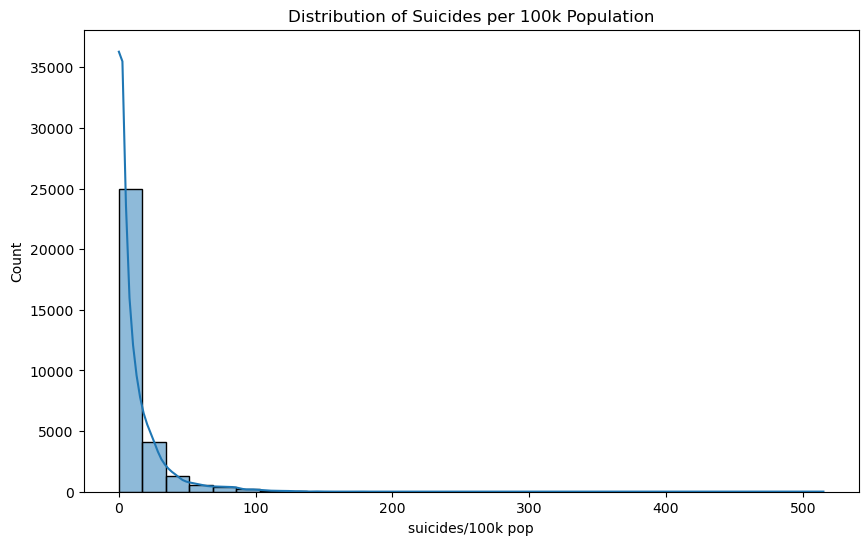

In [14]:
# Step 6: Univariate Analysis (Distribution of suicides per 100k)
plt.figure(figsize=(10, 6))
sns.histplot(df['suicides/100k pop'], bins=30, kde=True)
plt.title('Distribution of Suicides per 100k Population')
plt.show()

c:\Users\parth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


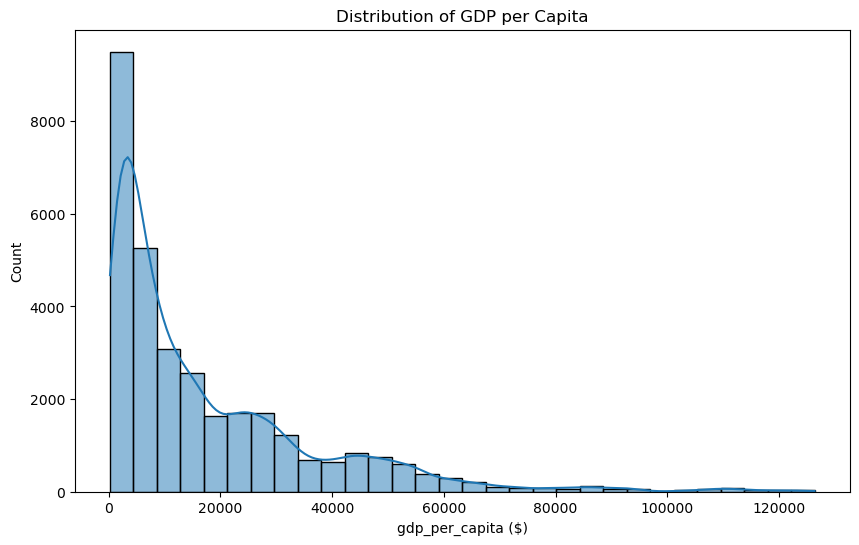

In [15]:
# Step 7: Univariate Analysis (GDP per Capita distribution)
plt.figure(figsize=(10, 6))
sns.histplot(df['gdp_per_capita ($)'], bins=30, kde=True)
plt.title('Distribution of GDP per Capita')
plt.show()

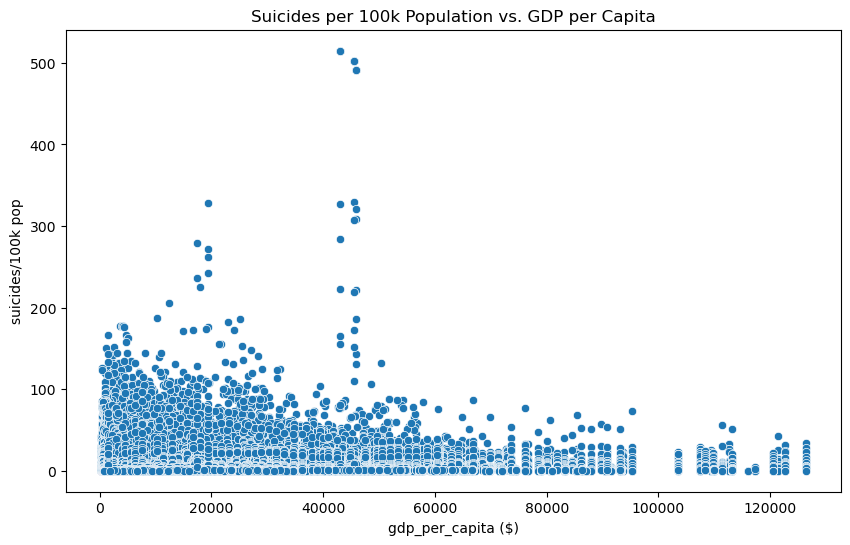

In [16]:
# Step 8: Bivariate Analysis (Suicides vs. GDP per capita)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=df)
plt.title('Suicides per 100k Population vs. GDP per Capita')
plt.show()

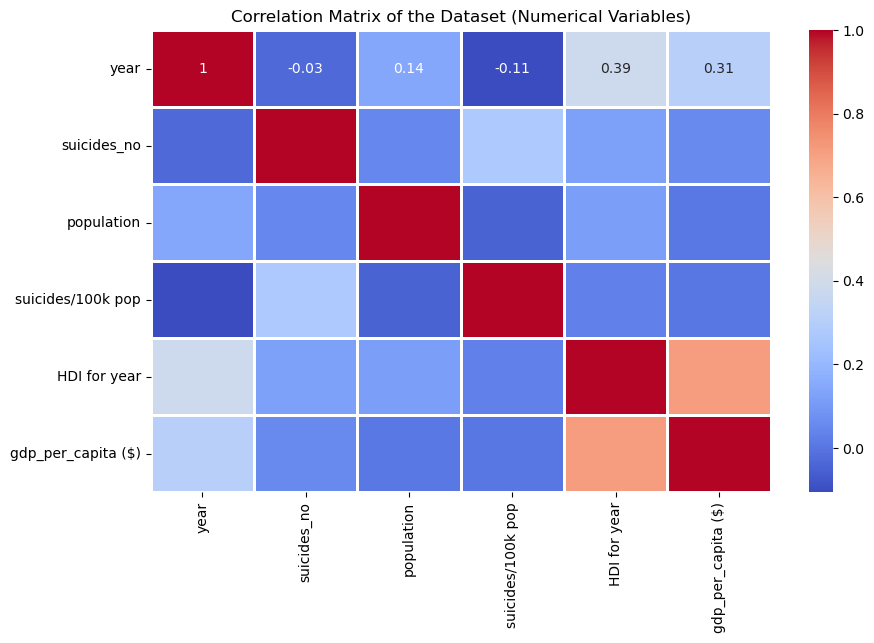

In [23]:
# Step 9: Correlation Heatmap (Numerical Variables)
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix of the Dataset (Numerical Variables)')
plt.show()


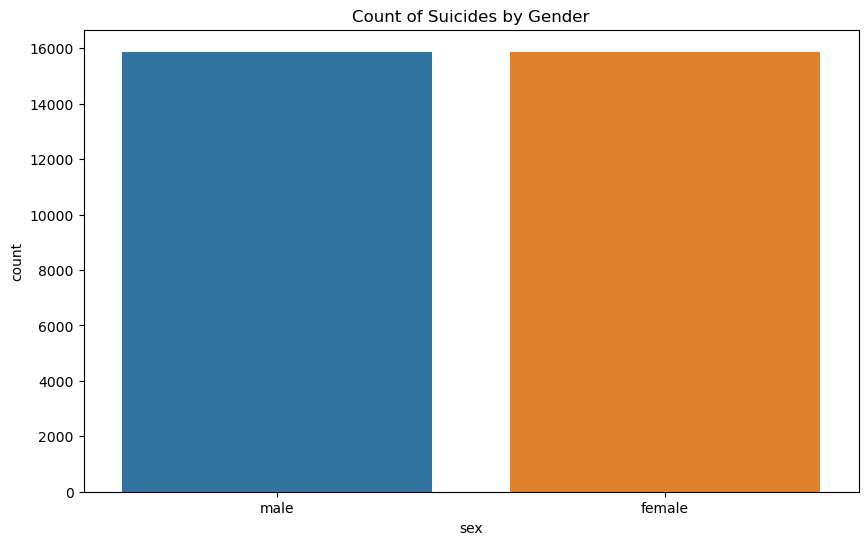

In [19]:
# Step 10: Suicides by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.title('Count of Suicides by Gender')
plt.show()

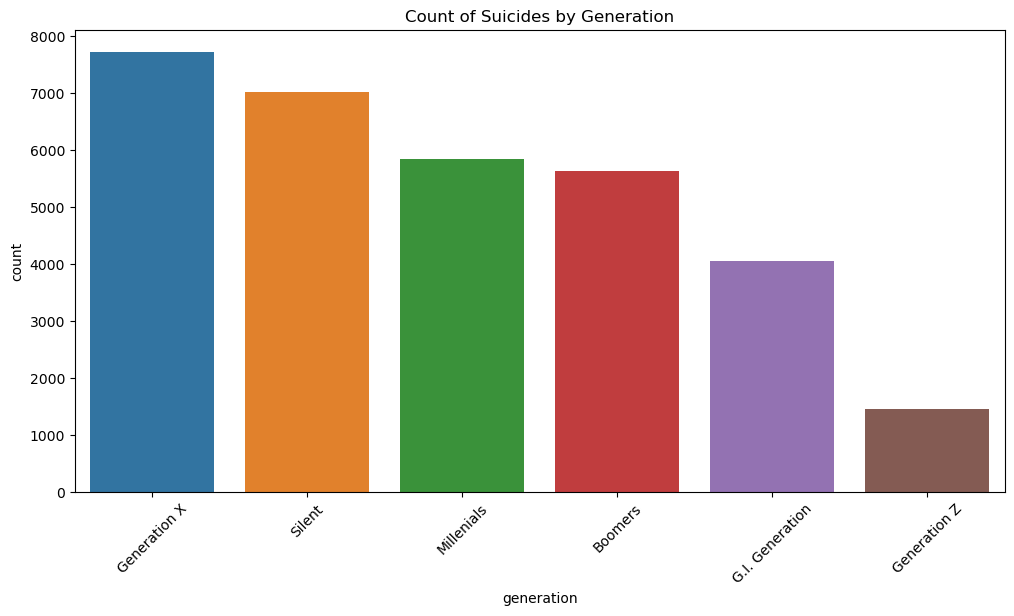

In [20]:
# Step 11: Suicides by Generation
plt.figure(figsize=(12, 6))
sns.countplot(x='generation', data=df, order=df['generation'].value_counts().index)
plt.title('Count of Suicides by Generation')
plt.xticks(rotation=45)
plt.show()

# Step 12: Conclusion
1. Distribution of Suicides per 100k Population:
The histogram shows that the majority of countries experience lower suicide rates (concentrated around 0–10 suicides per 100k people). However, there are some outliers where the rates are significantly higher.
This distribution indicates that while some regions have higher suicide rates, most are relatively low across the globe.
2. GDP per Capita Distribution:
The distribution of GDP per capita shows that a large proportion of countries have GDP per capita under $20,000, with a few outliers having much higher values.
This suggests a strong economic disparity between countries in the dataset.
3. Relationship Between Suicides per 100k and GDP per Capita:
The scatter plot between suicides per 100k and GDP per capita shows no clear linear correlation.
This suggests that a higher GDP per capita does not necessarily lead to lower suicide rates, indicating that economic wealth might not be a strong standalone factor in preventing suicides.
4. Correlation Analysis:
The heatmap shows weak correlations between numerical variables in the dataset. For example, there is only a slight negative correlation between gdp_per_capita and suicides/100k pop.
This weak relationship indicates that other factors, such as mental health, cultural norms, or social support systems, may play a more significant role in determining suicide rates than purely economic factors.
5. Suicides by Gender:
The count plot indicates that males generally have a higher count of suicides compared to females.
This aligns with existing literature and data, which often report that men are more likely to commit suicide, possibly due to differences in coping mechanisms, social expectations, and mental health stigma.
6. Suicides by Generation:
The generation plot shows that certain generations, like the "Boomers" and "Silent" generations, have higher suicide counts. This could be due to factors such as life stress during their prime years, economic pressures, or cultural factors.
Younger generations, like "Generation Z" and "Millennials", appear to have fewer suicides, but this could also be due to their shorter span in the dataset.